Nama    : Aphrodity Nirmala Putri

NIM     : 23/511906/PA/21852

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sympy as sp
import control as ct
from control.matlab import tf2ss, ss2zpk
from scipy.linalg import eig

1.

In [5]:
num = 500
den = [1, 14, 43, 30]
G = ct.TransferFunction(num, den)

1. a.

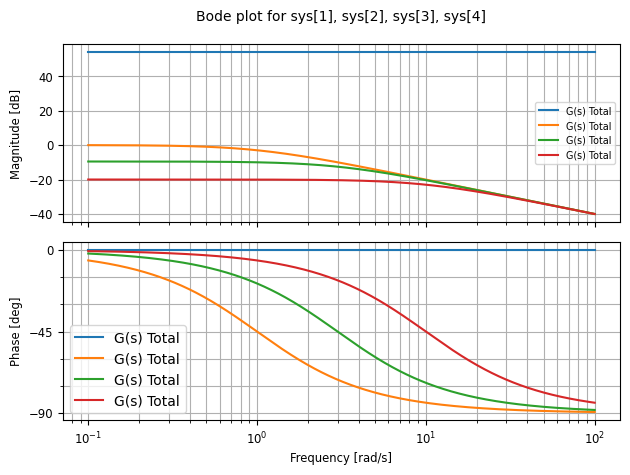

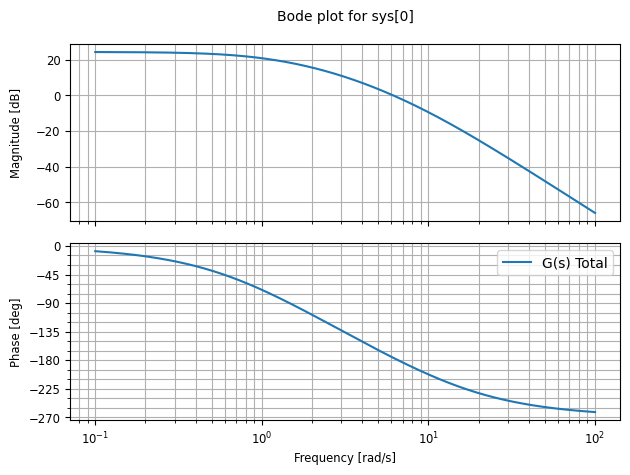

In [6]:
G1 = ct.TransferFunction(num, [1])
G2 = ct.TransferFunction([1], [1, 1]) 
G3 = ct.TransferFunction([1], [1, 3]) 
G4 = ct.TransferFunction([1], [1, 10])  

transfer_functions = [G1, G2, G3, G4]

plt.figure()
ct.bode_plot(transfer_functions, dB=True, label='G(s) Total')
plt.legend()
plt.show()

plt.figure()
ct.bode_plot(G, dB=True, label='G(s) Total')
plt.legend()
plt.show()

1. b.

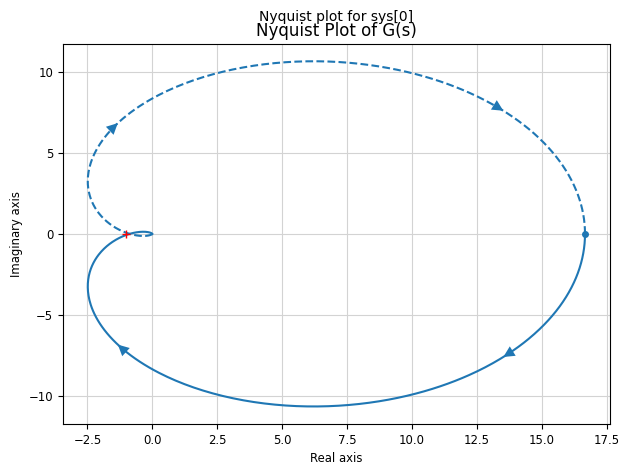

G(j1): magnitude = -1.2068, angle = 57.30 degrees
G(j5): magnitude = -1.2083, angle = 57.39 degrees


In [7]:
plt.figure()
ct.nyquist_plot(G)
plt.title('Nyquist Plot of G(s)')
plt.grid(True)
plt.show()

_, mag, phase = ct.frequency_response(G, [1, 5])

for idx, w in enumerate([1, 5]):
    print(f"G(j{w}): magnitude = {mag[idx]:.4f}, angle = {np.degrees(phase[idx]):.2f} degrees")

1. c.

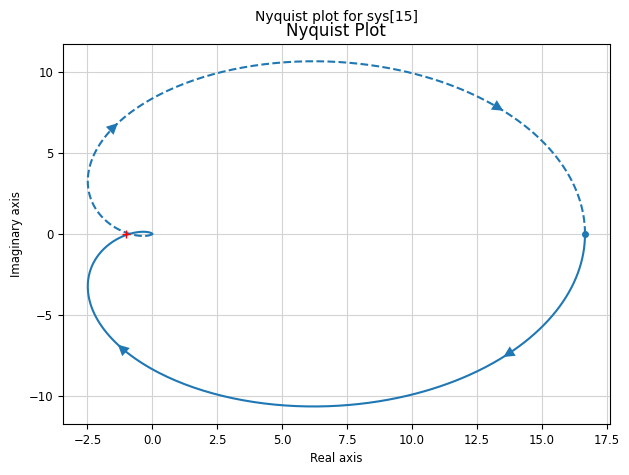

In [8]:
zeros = []
poles = [-1, -3, -10]
gain = 500
G_zpk = ct.zpk(zeros, poles, gain) # Use control.zpk to define the transfer function
# Nyquist plot
ct.nyquist_plot(G_zpk)
plt.title("Nyquist Plot")
plt.grid(True)
plt.show()

1. d.

In [9]:
# d. Batas penguatan agar sistem stabil (harus cari gain margin)
# gunakan margin() function (gm pm wg wp)
gm, pm, wg, wp = ct.margin(G)

# Cek dan print Gain Margin
if gm != np.inf:
    GM_dB = 20 * np.log10(gm)
    print(f"Gain margin (dB): {GM_dB:.2f} dB")
    print(f"Gain crossover frequency (rad/s): {wg:.4f}")
    K_max = gm
else:
    print("Gain margin: inf (sistem sudah stabil tanpa batasan)")
    K_max = 1  # Set K_max = 1 kalau GM inf

print(f"K maksimum untuk stabilitas: {K_max:.4f}")

Gain margin (dB): 1.17 dB
Gain crossover frequency (rad/s): 6.5574
K maksimum untuk stabilitas: 1.1440


1. e.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/freqplot.py:1786: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  nyquist_responses = nyquist_response(


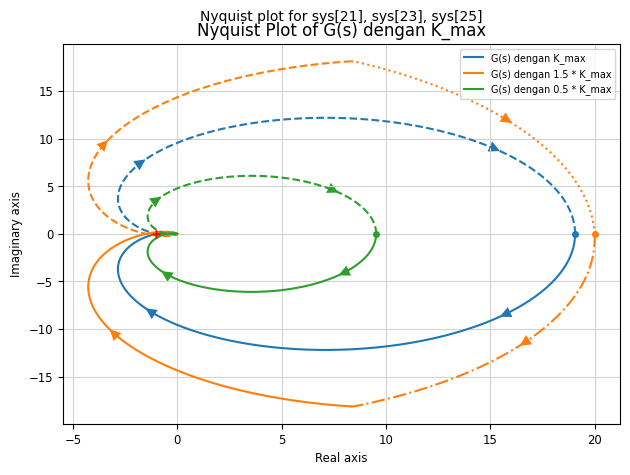

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/freqplot.py:1786: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  nyquist_responses = nyquist_response(


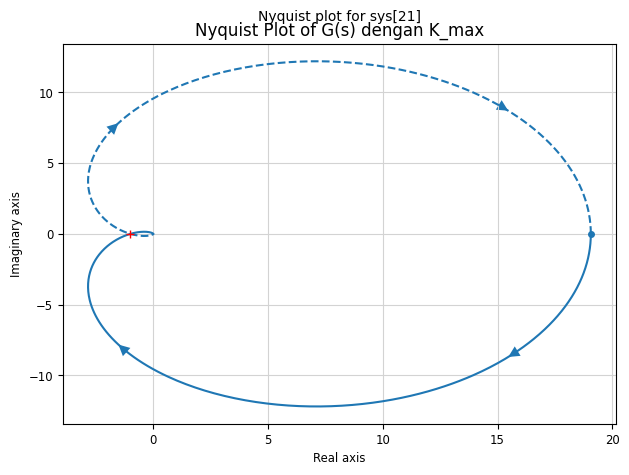

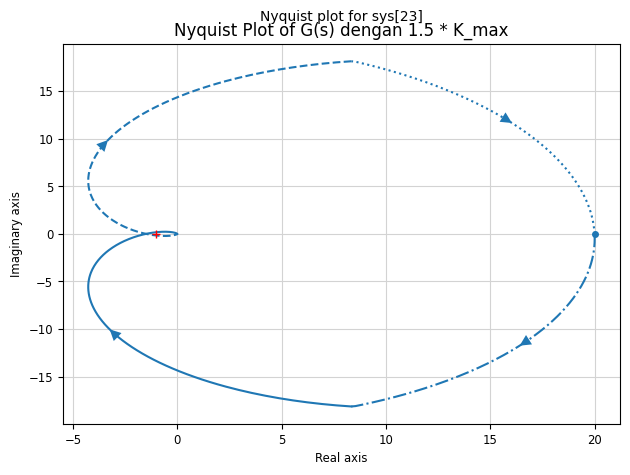

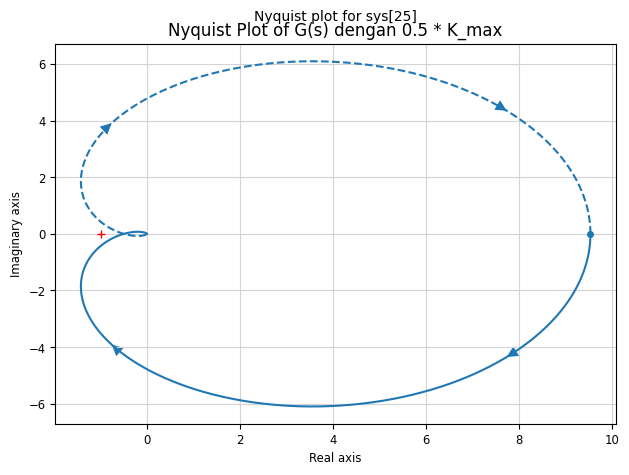

In [10]:
G_1 = G * K_max
G_2 = G * (K_max * 1.5)
G_3 = G * (K_max * 0.5)

plt.figure()
ct.nyquist_plot(G_1, label='G(s) dengan K_max')
ct.nyquist_plot(G_2, label='G(s) dengan 1.5 * K_max')
ct.nyquist_plot(G_3, label='G(s) dengan 0.5 * K_max')
plt.title('Nyquist Plot of G(s) dengan K_max')
plt.grid(True)
plt.show()

plt.figure()
ct.nyquist_plot(G_1, label='G(s) dengan K_max')
plt.title('Nyquist Plot of G(s) dengan K_max')
plt.grid(True)
plt.show()

plt.figure()
ct.nyquist_plot(G_2, label='G(s) dengan 1.5 * K_max')
plt.title('Nyquist Plot of G(s) dengan 1.5 * K_max')
plt.grid(True)
plt.show()

plt.figure()
ct.nyquist_plot(G_3, label='G(s) dengan 0.5 * K_max')
plt.title('Nyquist Plot of G(s) dengan 0.5 * K_max')
plt.grid(True)
plt.show()

1. f.

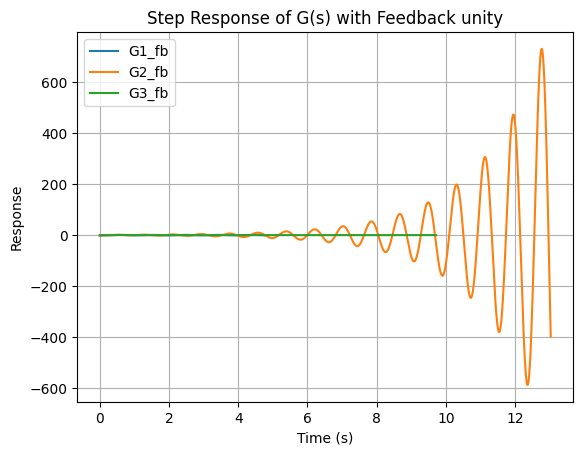

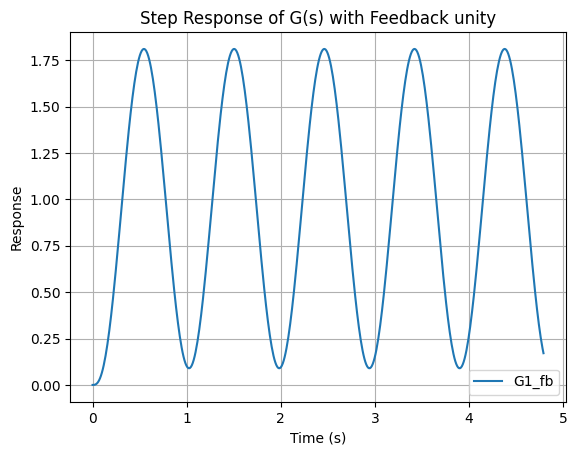

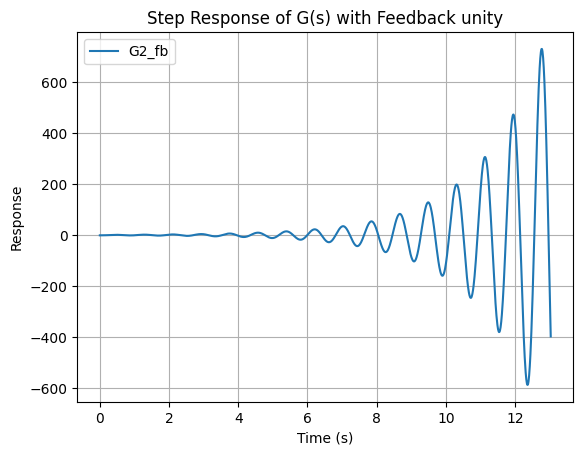

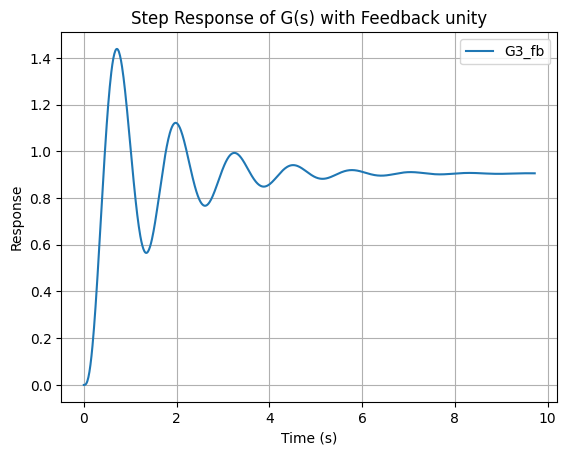

In [11]:
G1_fb = ct.feedback(G_1, 1)
G2_fb = ct.feedback(G_2, 1)
G3_fb = ct.feedback(G_3, 1) 

time, response = ct.step_response(G1_fb)
time2, response2 = ct.step_response(G2_fb)
time3, response3 = ct.step_response(G3_fb)

plt.figure()
plt.plot(time, response, label='G1_fb')
plt.plot(time2, response2, label='G2_fb')
plt.plot(time3, response3, label='G3_fb')
plt.title('Step Response of G(s) with Feedback unity')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(time, response, label='G1_fb')
plt.title('Step Response of G(s) with Feedback unity')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(time2, response2, label='G2_fb')
plt.title('Step Response of G(s) with Feedback unity')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(time3, response3, label='G3_fb')
plt.title('Step Response of G(s) with Feedback unity')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

2. 

In [12]:
num_p = [1.163e8]
den_p = [1, 962.5, 5.958e5, 1.16e8]
P = ct.tf(num_p, den_p)

num_g = 78.575 * np.polymul([1, 436], [1, 436])  # (s + 436)^2
den_g = np.polymul([1, 132], [1, 8030])
G = ct.tf(num_gc, den_gc)

Ts = ct.feedback(P, G)
print("P(s)", P)
print("G(s)", G)
print("T(s)", Ts)

NameError: name 'num_gc' is not defined

2. a.

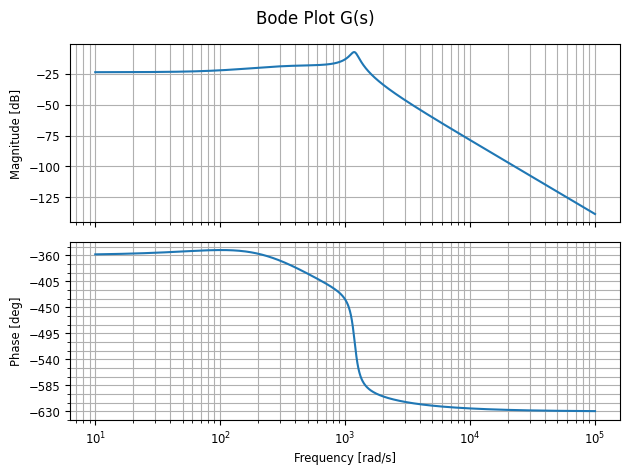

In [ ]:
plt.figure()
ct.bode_plot(Ts, dB=True)
plt.suptitle("Bode Plot G(s)")
plt.show()

2. b. 

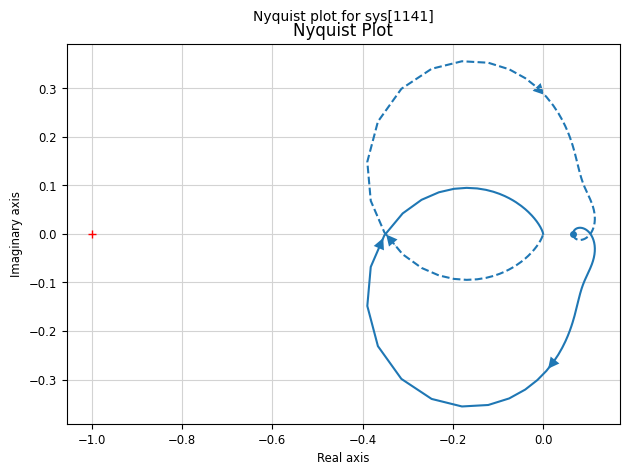

In [ ]:
ct.nyquist_plot(Ts)
plt.title("Nyquist Plot")
plt.grid(True)
plt.show()

2. c. 

2. d. 

In [ ]:
# d. Batas penguatan agar sistem stabil (harus cari gain margin)
# gunakan margin() function (gm pm wg wp)
gm, pm, wg, wp = ct.margin(Ts)

# Cek dan print Gain Margin
if gm != np.inf:
    GM_dB = 20 * np.log10(gm)
    print(f"Gain margin (dB): {GM_dB:.2f} dB")
    print(f"Gain crossover frequency (rad/s): {wg:.4f}")
    K_max = gm
else:
    print("Gain margin: inf (sistem sudah stabil tanpa batasan)")
    K_max = 1  # Set K_max = 1 kalau GM inf

print(f"K maksimum untuk stabilitas: {K_max:.4f}")

Gain margin (dB): 9.13 dB
Gain crossover frequency (rad/s): 1240.0570
K maksimum untuk stabilitas: 2.8602


2. e.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/freqplot.py:1786: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  nyquist_responses = nyquist_response(


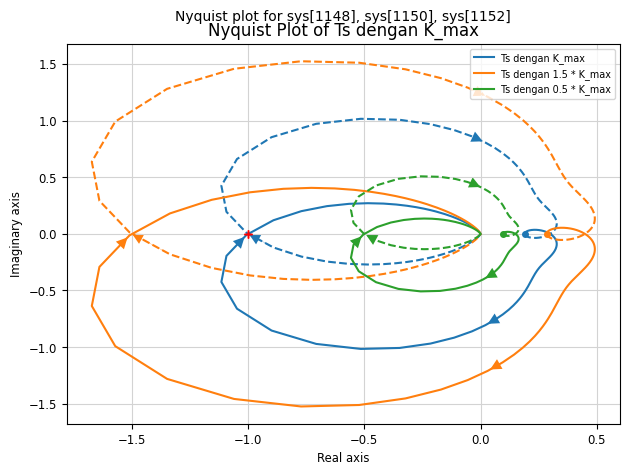

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/freqplot.py:1786: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  nyquist_responses = nyquist_response(


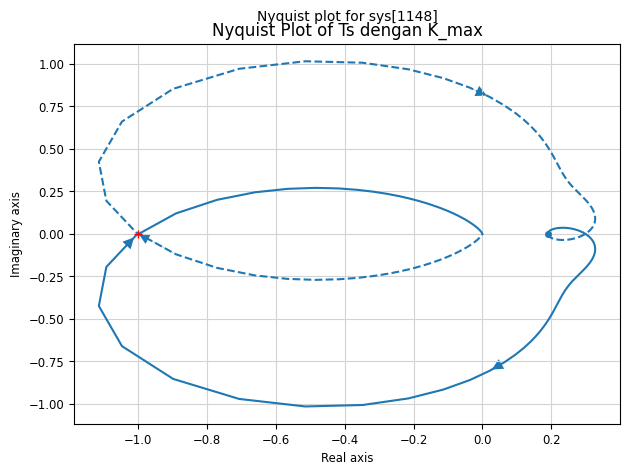

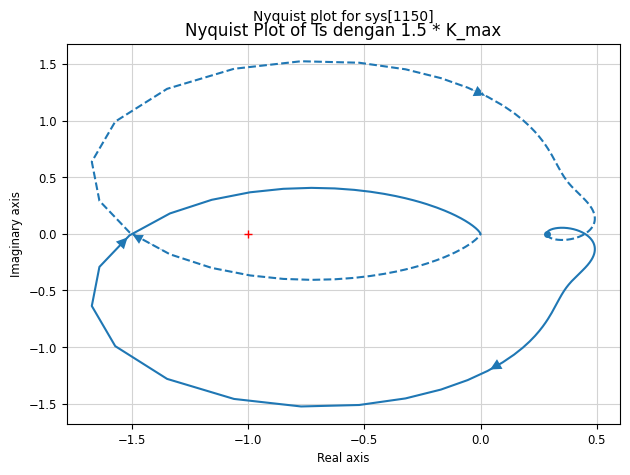

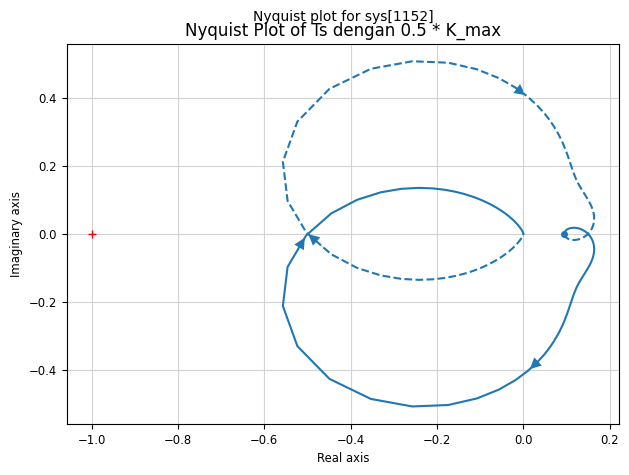

In [ ]:
T_1 = Ts * K_max
T_2 = Ts * (K_max * 1.5)
T_3 = Ts * (K_max * 0.5)

plt.figure()
ct.nyquist_plot(T_1, label='Ts dengan K_max')
ct.nyquist_plot(T_2, label='Ts dengan 1.5 * K_max')
ct.nyquist_plot(T_3, label='Ts dengan 0.5 * K_max')
plt.title('Nyquist Plot of Ts dengan K_max')
plt.grid(True)
plt.show()

plt.figure()
ct.nyquist_plot(T_1, label='Ts dengan K_max')
plt.title('Nyquist Plot of Ts dengan K_max')
plt.grid(True)
plt.show()

plt.figure()
ct.nyquist_plot(T_2, label='Ts dengan 1.5 * K_max')
plt.title('Nyquist Plot of Ts dengan 1.5 * K_max')
plt.grid(True)
plt.show()

plt.figure()
ct.nyquist_plot(T_3, label='Ts dengan 0.5 * K_max')
plt.title('Nyquist Plot of Ts dengan 0.5 * K_max')
plt.grid(True)
plt.show()

2. f.

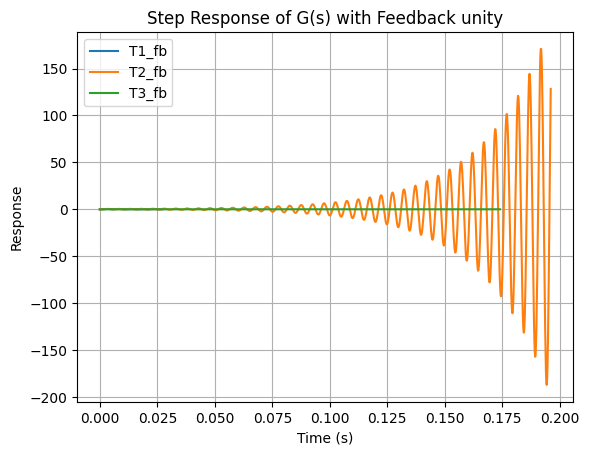

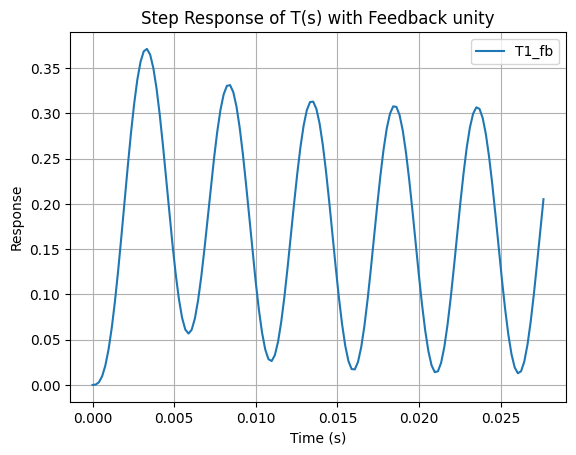

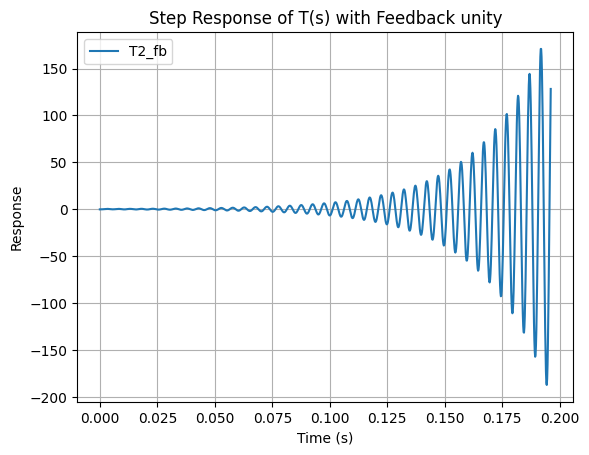

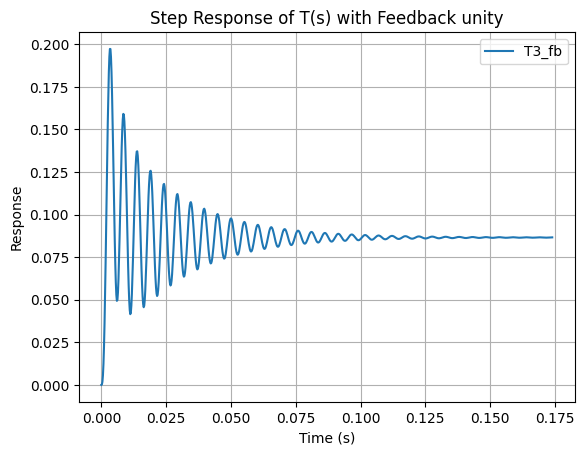

In [ ]:
T1_fb = ct.feedback(T_1, 1)
T2_fb = ct.feedback(T_2, 1)
T3_fb = ct.feedback(T_3, 1) 

time, response = ct.step_response(T1_fb)
time2, response2 = ct.step_response(T2_fb)
time3, response3 = ct.step_response(T3_fb)

plt.figure()
plt.plot(time, response, label='T1_fb')
plt.plot(time2, response2, label='T2_fb')
plt.plot(time3, response3, label='T3_fb')
plt.title('Step Response of G(s) with Feedback unity')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(time, response, label='T1_fb')
plt.title('Step Response of T(s) with Feedback unity')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(time2, response2, label='T2_fb')
plt.title('Step Response of T(s) with Feedback unity')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(time3, response3, label='T3_fb')
plt.title('Step Response of T(s) with Feedback unity')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()